In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import math
import random
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error



Import Data

In [2]:
df = pd.read_csv('C:/Users/yolau/OneDrive/Documents/TA/Kodingan/INCO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.0,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.0,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.0,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.0,25006200.0
1493,2023-12-14,4030.0,4220.0,4030.0,4170.0,4170.0,24832800.0


In [4]:
print("Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?\nAnswer:", df.isnull().sum().values.any())

Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?
Answer: True


In [5]:
# Menghitung jumlah nilai yang hilang per kolom
missing_values_count = df.isna().sum()

# Menampilkan jumlah nilai yang hilang
print(missing_values_count)

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [6]:
df = df.dropna()

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0
...,...,...,...,...,...,...,...
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.000000,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.000000,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.000000,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.000000,25006200.0


In [8]:
specific_df = df[['Date', 'Close', 'Open', 'High', 'Low']]

In [9]:
specific_df

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0
...,...,...,...,...,...
1489,2023-12-08,4360.0,4310.0,4430.0,4310.0
1490,2023-12-11,4190.0,4360.0,4370.0,4190.0
1491,2023-12-12,4220.0,4200.0,4250.0,4180.0
1492,2023-12-13,4020.0,4220.0,4230.0,4010.0


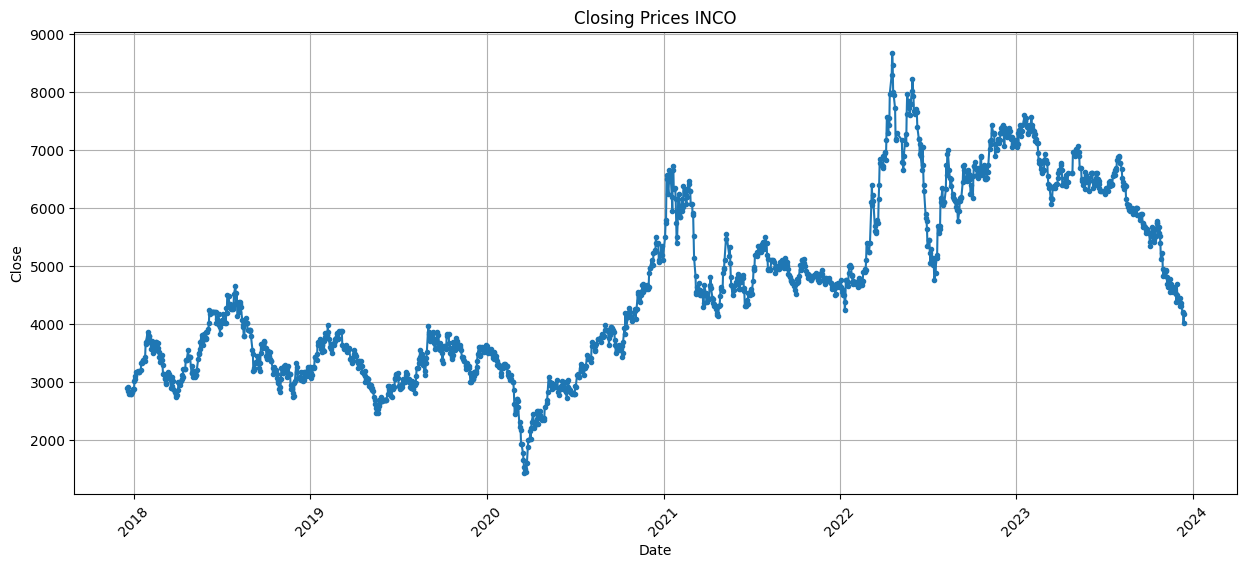

In [10]:
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], marker='.')
plt.title('Closing Prices INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

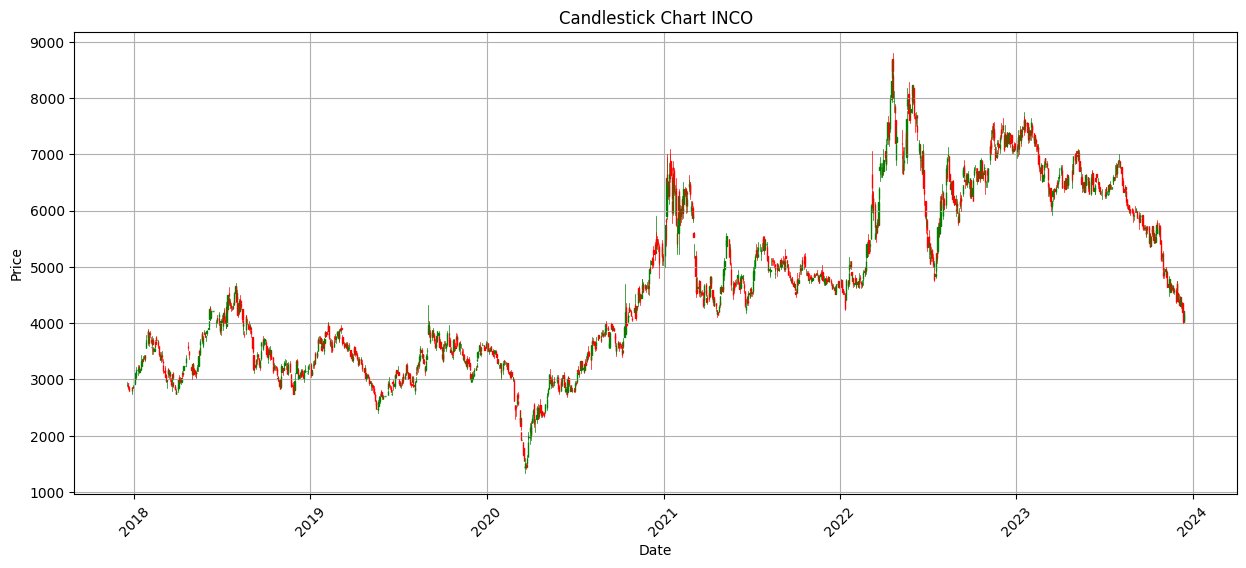

In [11]:
matplotlib_date = mdates.date2num(specific_df['Date'])

ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['High'], specific_df['Low'], specific_df['Close'])).T

plt.figure(figsize=(15,6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart INCO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

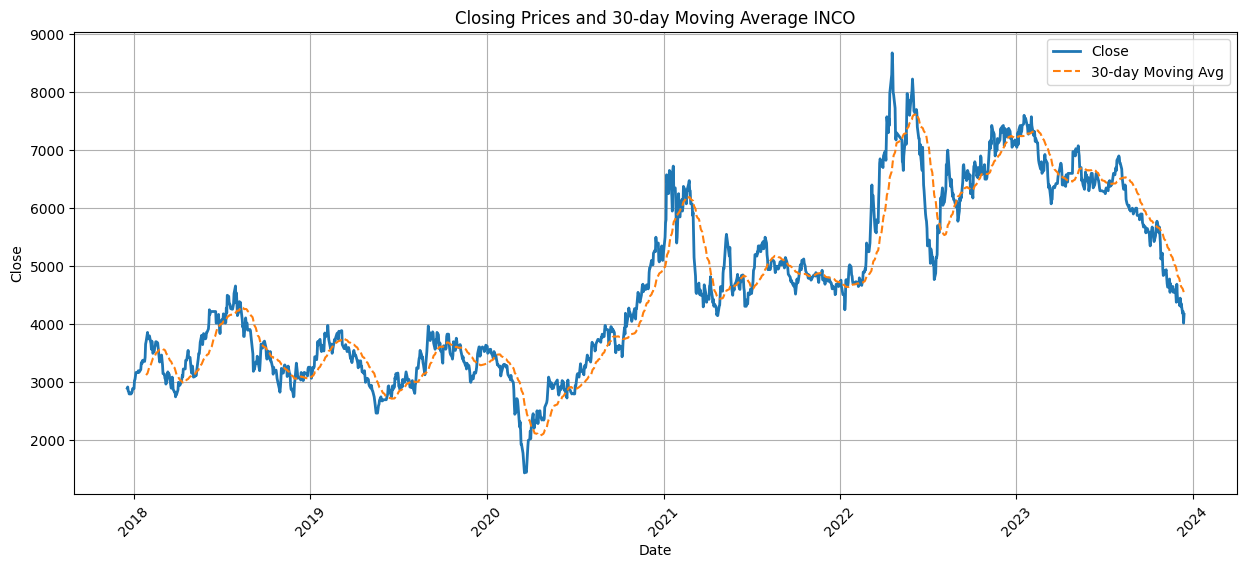

In [12]:
window = 30
plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], label='Close', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Close'].rolling(window=window).mean(),label=f'{window}-day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-day Moving Average INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
specific_df.head()

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0


In [14]:
new_df = specific_df.reset_index()['Close']

In [15]:
new_df

0       2900.0
1       2920.0
2       2850.0
3       2840.0
4       2800.0
         ...  
1488    4360.0
1489    4190.0
1490    4220.0
1491    4020.0
1492    4170.0
Name: Close, Length: 1493, dtype: float64

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1,1))

Partisi Data

In [17]:
train_size = int(len(scaled_data)*0.8) #80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [18]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [19]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1134, 60)
(1134,)


Testing set size:-
(239, 60)
(239,)


(None, None)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

LAyer = 3

dropout =  0.6

In [21]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.6))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=50))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam')

epoch = 50

In [24]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/50

36/36 [==============================] - 9s 94ms/step - loss: 0.0374 - val_loss: 0.0161
Epoch 2/50
36/36 [==============================] - 2s 55ms/step - loss: 0.0118 - val_loss: 0.0096
Epoch 3/50
36/36 [==============================] - 2s 54ms/step - loss: 0.0112 - val_loss: 0.0020
Epoch 4/50
36/36 [==============================] - 2s 56ms/step - loss: 0.0097 - val_loss: 0.0016
Epoch 5/50
36/36 [==============================] - 2s 52ms/step - loss: 0.0089 - val_loss: 0.0016
Epoch 6/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 7/50
36/36 [==============================] - 2s 58ms/step - loss: 0.0086 - val_loss: 0.0013
Epoch 8/50
36/36 [==============================] - 2s 55ms/step - loss: 0.0083 - val_loss: 0.0022
Epoch 9/50
36/36 [==============================] - 2s 54ms/step - loss: 0.0076 - val_loss: 0.0037
Epoch 10/50
36/36 [==============================] - 2s 59ms/step - loss: 0.0069 - val_loss: 0.0013
Epoch 11

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 21ms/step


In [26]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [27]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.0360085844296083
0.036886164183552235


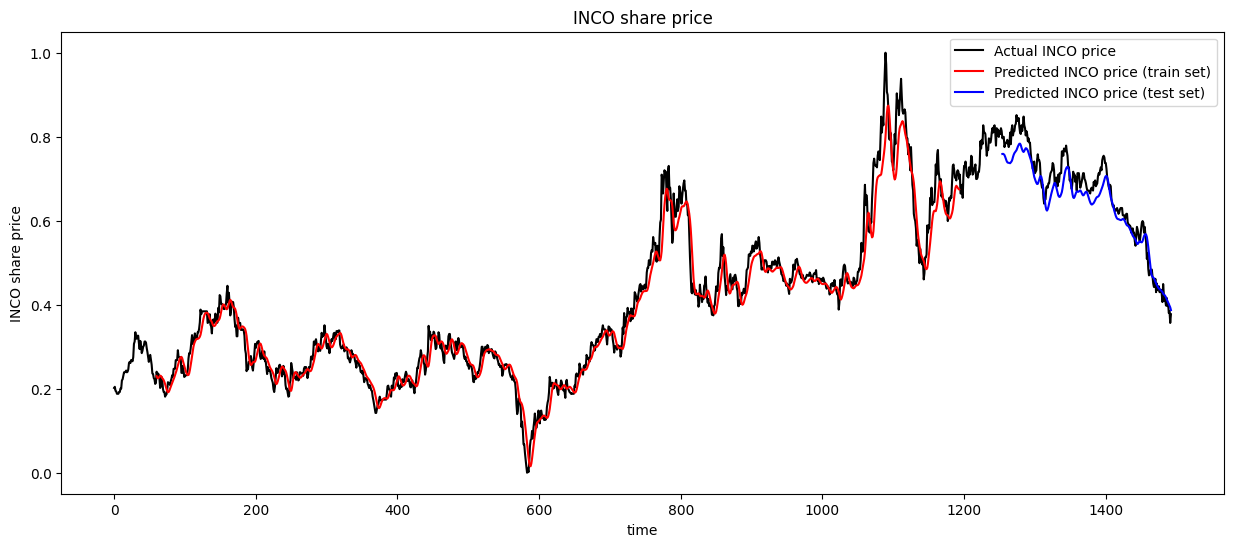

In [28]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [29]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 64ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4241.5400390625
Day 2: Predicted Price = 4201.74853515625
Day 3: Predicted Price = 4174.67431640625
Day 4: Predicted Price = 4158.52197265625
Day 5: Predicted Price = 4149.59716796875
Day 6: Predicted Price = 4144.5986328125
Day 7: Predicted Price = 4141.2802734375
Day 8: Predicted Price = 4138.36962890625
Day 9: Predicted Price = 4135.265625
Day 10: Predicted Price = 4131.74560546875
Day 11: Predicted Price = 4127.77099609375
Day 12: Predicted Price = 4123.37744140625
Day 13: Predicted Price = 4118.61865234375
Day 14: Predicted Price = 4113.55322265625
Day 15: Predicted Price = 4108.2373046875
Day 16: Predicted Price = 4102.72412109375
Day 17: Predicted Price = 4097.0654296875
Day 18: Predicted Price = 4091.31103515625
Day 19: Predicted Price = 4085.50537109375
Day 20: Predicted Price = 4079.6884765625
Day 21: Predicted Price = 4073.89306640625
Day 22: Predicted Price = 4068.

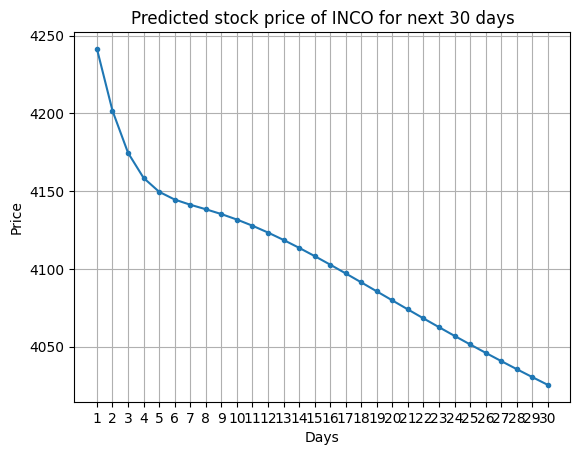

In [30]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [31]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 24ms/step - loss: 0.0014
Validation Loss: 0.0013605894055217505
Validation MSE Loss: 0.0013605894055217505


In [32]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.0360085844296083
Testing RMSE: 0.036886164183552235


epoch = 75

In [33]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=75,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/75


36/36 [==============================] - 2s 68ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 2/75
36/36 [==============================] - 2s 62ms/step - loss: 0.0031 - val_loss: 6.8444e-04
Epoch 3/75
36/36 [==============================] - 2s 63ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 4/75
36/36 [==============================] - 2s 61ms/step - loss: 0.0029 - val_loss: 9.2106e-04
Epoch 5/75
36/36 [==============================] - 2s 62ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 6/75
36/36 [==============================] - 2s 60ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 7/75
36/36 [==============================] - 2s 60ms/step - loss: 0.0027 - val_loss: 5.7238e-04
Epoch 8/75
36/36 [==============================] - 2s 63ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 9/75
36/36 [==============================] - 2s 60ms/step - loss: 0.0028 - val_loss: 6.9303e-04
Epoch 10/75
36/36 [==============================] - 2s 60ms/step - loss: 0.0026 - val_loss: 5.8498e-04


In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 19ms/step


In [35]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [36]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.03071879169344911
0.019416156783461605


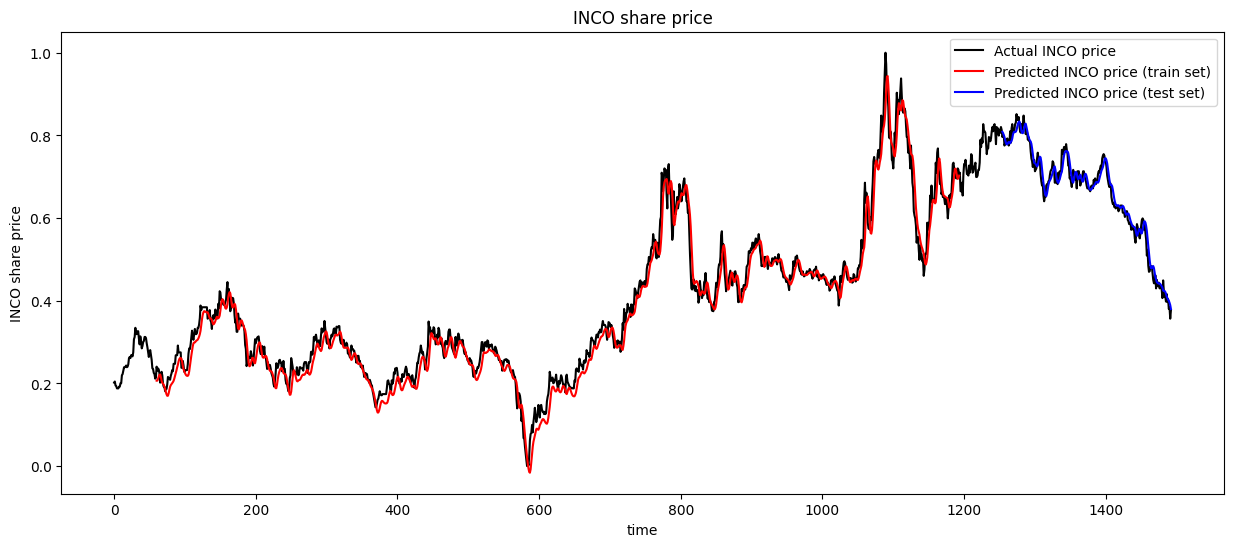

In [37]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [38]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 26ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4189.10205078125
Day 2: Predicted Price = 4137.6123046875
Day 3: Predicted Price = 4108.58935546875
Day 4: Predicted Price = 4094.211669921875
Day 5: Predicted Price = 4086.185791015625
Day 6: Predicted Price = 4079.243408203125
Day 7: Predicted Price = 4070.928955078125
Day 8: Predicted Price = 4060.49658203125
Day 9: Predicted Price = 4047.9970703125
Day 10: Predicted Price = 4033.760986328125
Day 11: Predicted Price = 4018.1650390625
Day 12: Predicted Price = 4001.5498046875
Day 13: Predicted Price = 3984.19287109375
Day 14: Predicted Price = 3966.310302734375
Day 15: Predicted Price = 3948.05810546875
Day 16: Predicted Price = 3929.540283203125
Day 17: Predicted Price = 3910.8154296875
Day 18: Predicted Price = 3891.908203125
Day 19: Predicted Price = 3872.8193359375
Day 20: Predicted Price = 3853.532470703125
Day 21: Predicted Price = 3834.023193359375
Day 22: Predicted P

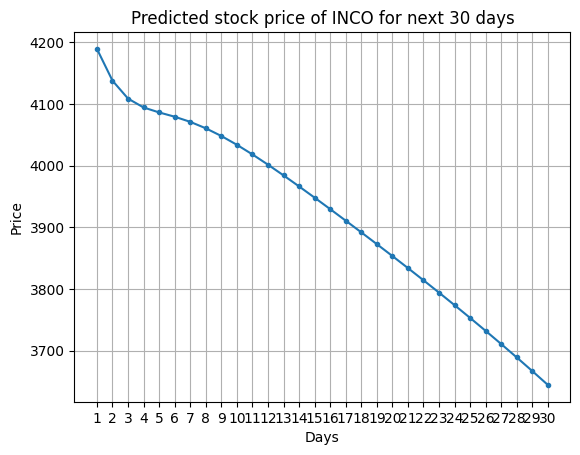

In [39]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [40]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 19ms/step - loss: 3.7699e-04
Validation Loss: 0.0003769871254917234
Validation MSE Loss: 0.0003769871254917234


In [41]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.03071879169344911
Testing RMSE: 0.019416156783461605


epoch = 100

In [42]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 2s 61ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 2/100
36/36 [==============================] - 2s 63ms/step - loss: 0.0025 - val_loss: 4.3829e-04
Epoch 3/100
36/36 [==============================] - 2s 64ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 4/100
36/36 [==============================] - 2s 60ms/step - loss: 0.0024 - val_loss: 4.1116e-04
Epoch 5/100
36/36 [==============================] - 2s 62ms/step - loss: 0.0024 - val_loss: 5.6820e-04
Epoch 6/100
36/36 [==============================] - 2s 61ms/step - loss: 0.0022 - val_loss: 7.3550e-04
Epoch 7/100
36/36 [==============================] - 2s 62ms/step - loss: 0.0020 - val_loss: 4.7398e-04
Epoch 8/100
36/36 [==============================] - 2s 65ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 9/100
36/36 [==============================] - 2s 60ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 10/100
36/36 [==============================] - 2s 60ms/step - loss: 0.002

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 20ms/step


In [44]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [45]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.025766119879667187
0.01842315333399444


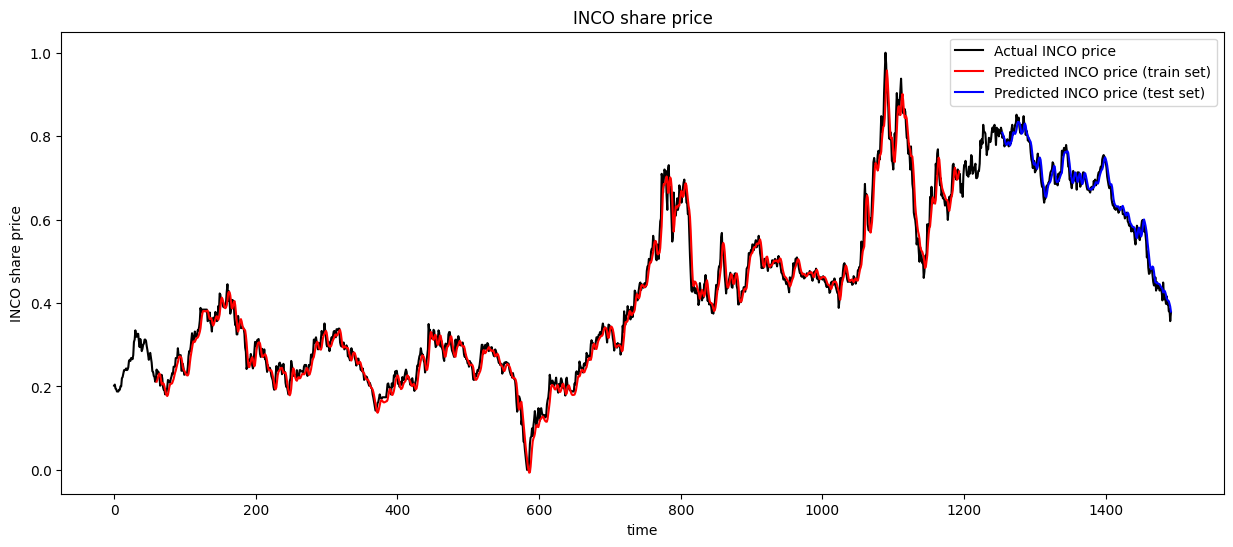

In [46]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [47]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 24ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4187.1591796875
Day 2: Predicted Price = 4141.8984375
Day 3: Predicted Price = 4131.9140625
Day 4: Predicted Price = 4137.93310546875
Day 5: Predicted Price = 4146.90576171875
Day 6: Predicted Price = 4153.40771484375
Day 7: Predicted Price = 4156.4482421875
Day 8: Predicted Price = 4156.75537109375
Day 9: Predicted Price = 4155.3662109375
Day 10: Predicted Price = 4153.10888671875
Day 11: Predicted Price = 4150.50927734375
Day 12: Predicted Price = 4147.84716796875
Day 13: Predicted Price = 4145.24169921875
Day 14: Predicted Price = 4142.71875
Day 15: Predicted Price = 4140.26171875
Day 16: Predicted Price = 4137.83935546875
Day 17: Predicted Price = 4135.42138671875
Day 18: Predicted Price = 4132.98583984375
Day 19: Predicted Price = 4130.5185546875
Day 20: Predicted Price = 4128.01318359375
Day 21: Predicted Price = 4125.46728515625
Day 22: Predicted Price = 4122.8823242187

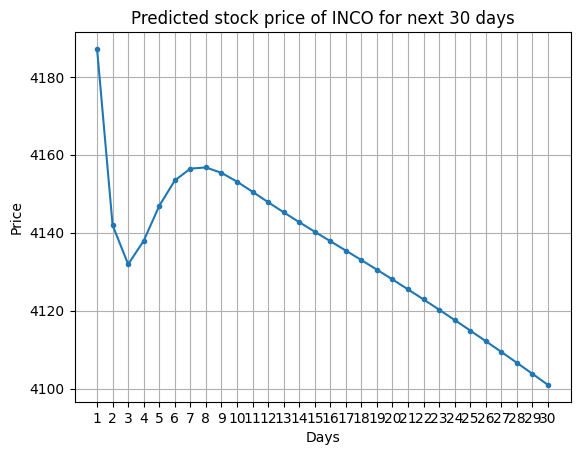

In [48]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [49]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 22ms/step - loss: 3.3941e-04
Validation Loss: 0.000339412537869066
Validation MSE Loss: 0.000339412537869066


In [50]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.025766119879667187
Testing RMSE: 0.01842315333399444


epoch = 125

In [51]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
36/36 [==============================] - 2s 62ms/step - loss: 0.0021 - val_loss: 3.6432e-04
Epoch 2/125
36/36 [==============================] - 2s 62ms/step - loss: 0.0022 - val_loss: 4.0504e-04
Epoch 3/125
36/36 [==============================] - 2s 65ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 4/125
36/36 [==============================] - 2s 61ms/step - loss: 0.0019 - val_loss: 5.1093e-04
Epoch 5/125
36/36 [==============================] - 2s 61ms/step - loss: 0.0026 - val_loss: 8.4857e-04
Epoch 6/125
36/36 [==============================] - 2s 61ms/step - loss: 0.0020 - val_loss: 3.5049e-04
Epoch 7/125
36/36 [==============================] - 2s 61ms/step - loss: 0.0024 - val_loss: 3.6586e-04
Epoch 8/125
36/36 [==============================] - 2s 65ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 9/125
36/36 [==============================] - 2s 61ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 10/125
36/36 [==============================] - 2s 61ms/step - loss: 0

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 20ms/step


In [53]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [54]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02459820437545821
0.01833520916934728


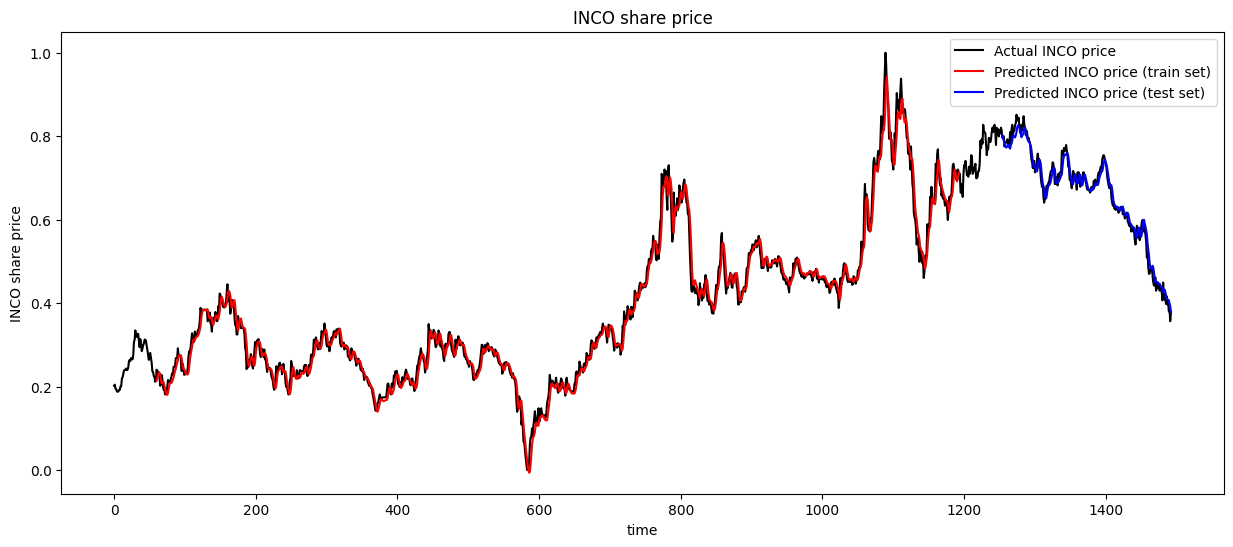

In [55]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [56]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 32ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4189.119140625
Day 2: Predicted Price = 4153.1689453125
Day 3: Predicted Price = 4156.525390625
Day 4: Predicted Price = 4173.7822265625
Day 5: Predicted Price = 4191.22998046875
Day 6: Predicted Price = 4204.76171875
Day 7: Predicted Price = 4214.64013671875
Day 8: Predicted Price = 4222.24169921875
Day 9: Predicted Price = 4228.751953125
Day 10: Predicted Price = 4234.88671875
Day 11: Predicted Price = 4240.9814453125
Day 12: Predicted Price = 4247.15087890625
Day 13: Predicted Price = 4253.4072265625
Day 14: Predicted Price = 4259.73046875
Day 15: Predicted Price = 4266.10009765625
Day 16: Predicted Price = 4272.50341796875
Day 17: Predicted Price = 4278.93896484375
Day 18: Predicted Price = 4285.41015625
Day 19: Predicted Price = 4291.92529296875
Day 20: Predicted Price = 4298.490234375
Day 21: Predicted Price = 4305.1123046875
Day 22: Predicted Price = 4311.79638671875
Da

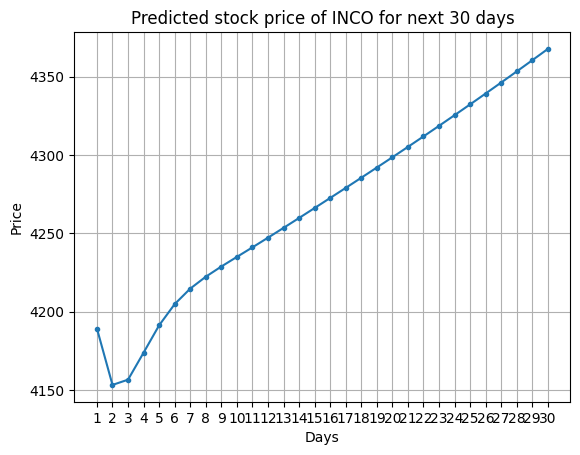

In [57]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [58]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 21ms/step - loss: 3.3618e-04
Validation Loss: 0.00033617985900491476
Validation MSE Loss: 0.00033617985900491476


In [59]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.02459820437545821
Testing RMSE: 0.01833520916934728


epoch = 150 

In [60]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=150,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/150
36/36 [==============================] - 2s 66ms/step - loss: 0.0021 - val_loss: 5.6592e-04
Epoch 2/150
36/36 [==============================] - 2s 61ms/step - loss: 0.0021 - val_loss: 9.2053e-04
Epoch 3/150
36/36 [==============================] - 2s 61ms/step - loss: 0.0020 - val_loss: 7.6229e-04
Epoch 4/150
36/36 [==============================] - 2s 63ms/step - loss: 0.0019 - val_loss: 4.0856e-04
Epoch 5/150
36/36 [==============================] - 2s 63ms/step - loss: 0.0021 - val_loss: 3.9009e-04
Epoch 6/150
36/36 [==============================] - 2s 63ms/step - loss: 0.0021 - val_loss: 4.0657e-04
Epoch 7/150
36/36 [==============================] - 2s 66ms/step - loss: 0.0018 - val_loss: 3.1512e-04
Epoch 8/150
36/36 [==============================] - 2s 64ms/step - loss: 0.0021 - val_loss: 7.0919e-04
Epoch 9/150
36/36 [==============================] - 2s 64ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 10/150
36/36 [==============================] - 2s 60ms/step -

In [61]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 16ms/step


In [62]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [63]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02460842521169028
0.01775165131054126


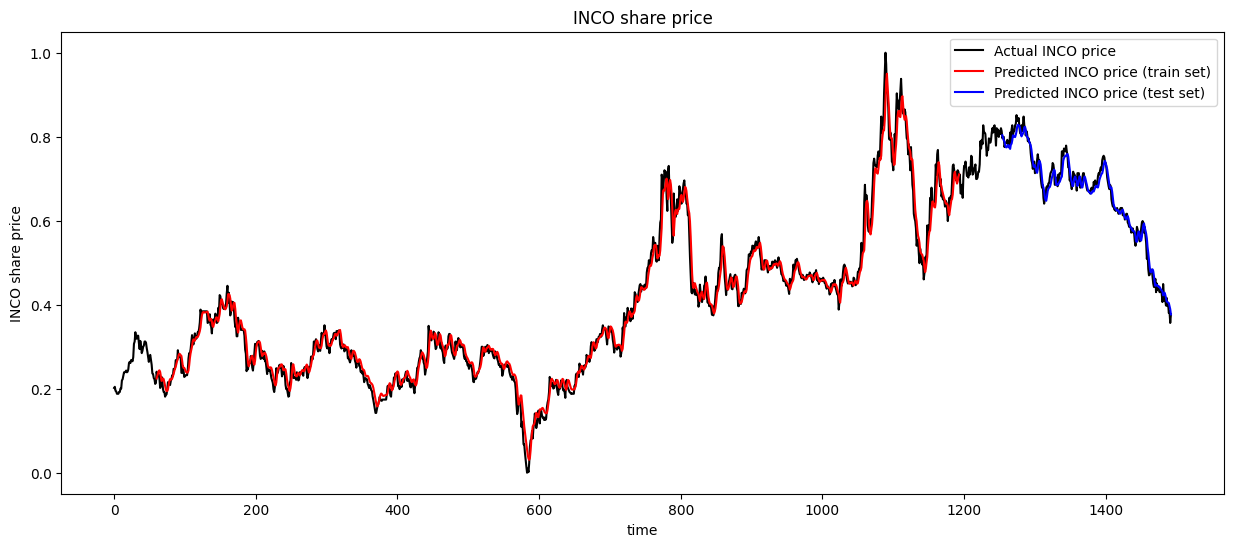

In [64]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [65]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 49ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4168.39111328125
Day 2: Predicted Price = 4131.533203125
Day 3: Predicted Price = 4131.3681640625
Day 4: Predicted Price = 4143.7568359375
Day 5: Predicted Price = 4156.10595703125
Day 6: Predicted Price = 4164.78759765625
Day 7: Predicted Price = 4170.12841796875
Day 8: Predicted Price = 4173.4052734375
Day 9: Predicted Price = 4175.673828125
Day 10: Predicted Price = 4177.53857421875
Day 11: Predicted Price = 4179.25732421875
Day 12: Predicted Price = 4180.900390625
Day 13: Predicted Price = 4182.46240234375
Day 14: Predicted Price = 4183.9248046875
Day 15: Predicted Price = 4185.279296875
Day 16: Predicted Price = 4186.5283203125
Day 17: Predicted Price = 4187.68701171875
Day 18: Predicted Price = 4188.7724609375
Day 19: Predicted Price = 4189.80322265625
Day 20: Predicted Price = 4190.79443359375
Day 21: Predicted Price = 4191.75830078125
Day 22: Predicted Price = 4192.703

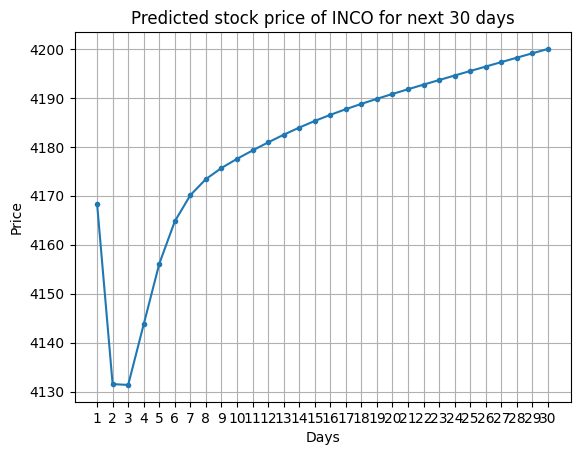

In [66]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [67]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 22ms/step - loss: 3.1512e-04
Validation Loss: 0.00031512108398601413
Validation MSE Loss: 0.00031512108398601413


In [68]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.02460842521169028
Testing RMSE: 0.01775165131054126
